In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bom_df = pd.read_csv("dsc-phase-1-project-master/zippedData/bom.movie_gross.csv.gz")
imdb_name = pd.read_csv("dsc-phase-1-project-master/zippedData/imdb.title.basics.csv.gz")
imdb_rating = pd.read_csv("dsc-phase-1-project-master/zippedData/imdb.title.ratings.csv.gz")

In [3]:
imdb_name.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
print(imdb_name.info())
print("NA: \n", imdb_name.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
NA: 
 tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [5]:
print("NA: \n", imdb_rating.isna().sum())
imdb_rating.info()


NA: 
 tconst           0
averagerating    0
numvotes         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
#left joint using imdb_rating with imdb_name
movies_df = imdb_rating.merge(imdb_name, on='tconst', how='left') 

print("NA: \n", movies_df.isna().sum())
movies_df.info()

NA: 
 tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [7]:
movies_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [8]:
#check for duplicate rows
movies_df.duplicated().sum()

0

In [9]:
movies_df.columns

Index(['tconst', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')

In [10]:
#dropping unusefull columns
movies_df = movies_df.drop(columns = ['original_title', 'runtime_minutes', 'tconst'])

In [11]:
#renaming columns
movies_df = movies_df.rename({'primary_title': 'title', 'start_year' : 'year'}, axis=1)
movies_df = movies_df[['title', 'genres', 'year', 'numvotes', 'averagerating']]

In [12]:
#removing row if row in column 'genres' is NA
movies_df.dropna(subset = ['genres'], inplace = True)

#check for duplicates and NA
print('Duplicated: \n', movies_df.duplicated().sum())
print('is NA: \n', movies_df.isna().sum())

Duplicated: 
 0
is NA: 
 title            0
genres           0
year             0
numvotes         0
averagerating    0
dtype: int64


In [13]:
print(movies_df.info())
movies_df

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          73052 non-null  object 
 1   genres         73052 non-null  object 
 2   year           73052 non-null  int64  
 3   numvotes       73052 non-null  int64  
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.3+ MB
None


,title,genres,year,numvotes,averagerating
0,Laiye Je Yaarian,Romance,2019,31,8.3
1,Borderless,Documentary,2019,559,8.9
2,Just Inès,Drama,2010,20,6.4
3,The Legend of Hercules,"Action,Adventure,Fantasy",2014,50352,4.2
4,Até Onde?,"Mystery,Thriller",2011,21,6.5
...,...,...,...,...,...
73851,Caisa,Documentary,2018,25,8.1
73852,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi",2018,24,7.5
73853,Sisters,"Action,Drama",2019,14,4.7
73854,The Projectionist,Documentary,2019,5,7.0


In [14]:
#Creating smaller df for Genre evaluation and analysis
genre_df = movies_df.assign(genres = movies_df['genres'].str.split(',')).explode('genres')

genre_df

,title,genres,year,numvotes,averagerating
0,Laiye Je Yaarian,Romance,2019,31,8.3
1,Borderless,Documentary,2019,559,8.9
2,Just Inès,Drama,2010,20,6.4
3,The Legend of Hercules,Action,2014,50352,4.2
3,The Legend of Hercules,Adventure,2014,50352,4.2
...,...,...,...,...,...
73852,Code Geass: Lelouch of the Rebellion - Glorifi...,Sci-Fi,2018,24,7.5
73853,Sisters,Action,2019,14,4.7
73853,Sisters,Drama,2019,14,4.7
73854,The Projectionist,Documentary,2019,5,7.0


In [15]:
print(max(genre_df.year), min(genre_df.year))

2019 2010


In [16]:
#sorted by the total amount of movies that contains a specific genre
#movies from 2010 - 2019

movies_genre = (pd.DataFrame(genre_df.groupby('genres', as_index = False).title.nunique())).sort_values(
    by = 'title', ascending = False).reset_index(drop = True)
movies_genre

,genres,title
0,Drama,29361
1,Documentary,17642
2,Comedy,17048
3,Thriller,7939
4,Horror,7475
5,Action,6869
6,Romance,6488
7,Crime,4543
8,Biography,3799
9,Adventure,3796


Text(0.0, 1.0, 'Genres belonging to movies made from 2010 - 2019')

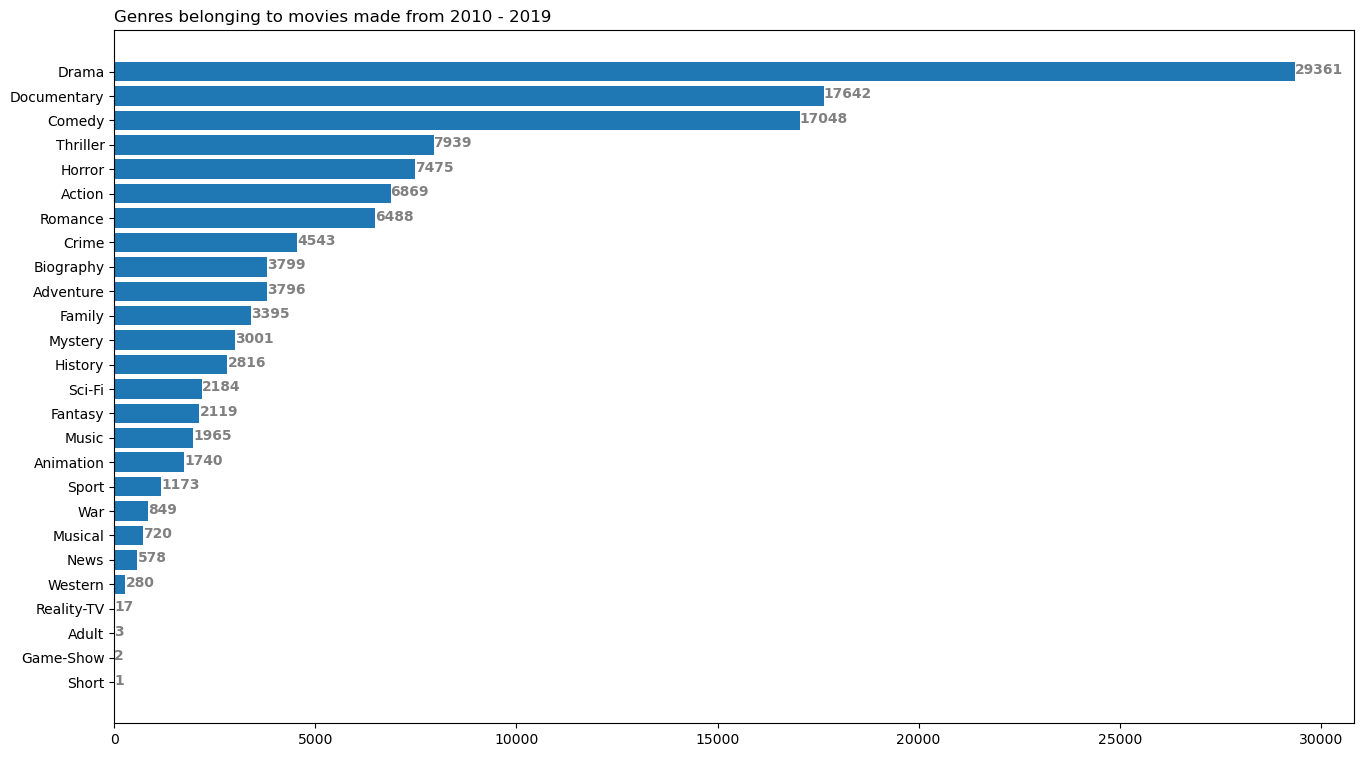

In [17]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(movies_genre.genres, movies_genre.title)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Genres belonging to movies made from 2010 - 2019',
             loc ='left', )

In [18]:
#Numvotes 
numvotes_genre = (pd.DataFrame(genre_df.groupby('genres').numvotes.sum())).sort_values(
    by = 'numvotes', ascending = False).reset_index()

numvotes_genre

,genres,numvotes
0,Drama,119567500
1,Action,101161682
2,Adventure,84232589
3,Comedy,74305805
4,Thriller,48155313
5,Sci-Fi,42960289
6,Crime,39631356
7,Romance,26913873
8,Fantasy,26335704
9,Mystery,24657286


In [19]:
#Avarage rating for each genre, maybe include numvotes to avoid bias ratings
topratings_genre = (pd.DataFrame(genre_df.groupby('genres',).averagerating.mean())).sort_values(
    by = 'averagerating', ascending = False ).reset_index()

topratings_genre

,genres,averagerating
0,Short,8.800000
1,Documentary,7.332090
2,Game-Show,7.300000
3,News,7.271330
4,Biography,7.162274
5,Music,7.091972
6,History,7.040956
7,Sport,6.961493
8,War,6.584291
9,Reality-TV,6.500000


Text(0.0, 1.0, 'Average Ratings For Genres')

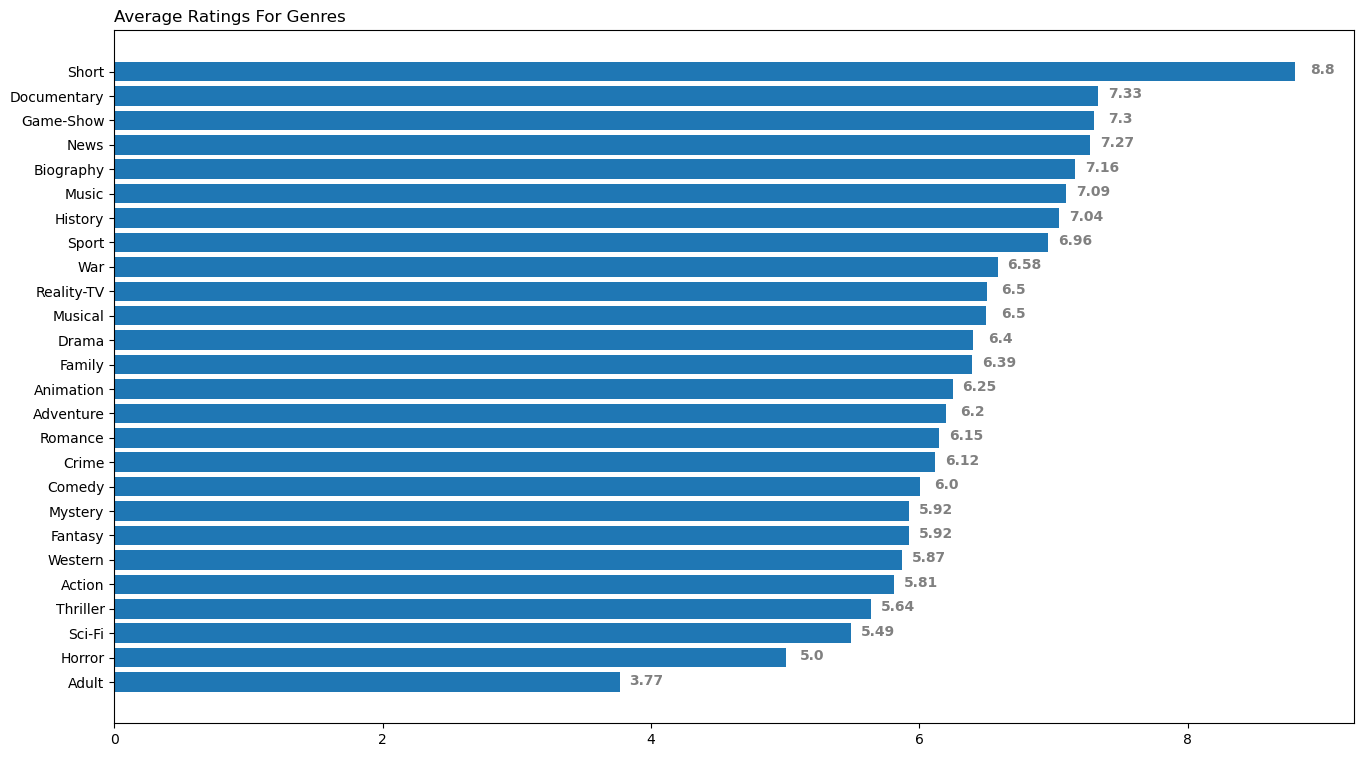

In [20]:

fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(topratings_genre.genres, topratings_genre.averagerating)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey',
            ha = 'center')

ax.set_title('Average Ratings For Genres',
             loc ='left', )


In [21]:
## We can check for biasness by comparing number of votes against average rating

numvotes_vs_averagerating = numvotes_genre.merge(topratings_genre, on='genres', how='outer').sort_values(by = 'numvotes').reset_index(drop = True)
numvotes_vs_averagerating['numvotes_mill'] = numvotes_vs_averagerating['numvotes']/10**6
numvotes_vs_averagerating

,genres,numvotes,averagerating,numvotes_mill
0,Short,8,8.800000,0.000008
1,Adult,164,3.766667,0.000164
2,Reality-TV,459,6.500000,0.000459
3,Game-Show,3469,7.300000,0.003469
4,News,123319,7.271330,0.123319
5,Musical,1387965,6.498336,1.387965
6,Western,2452376,5.868214,2.452376
7,War,2684725,6.584291,2.684725
8,Sport,3755824,6.961493,3.755824
9,Documentary,4739345,7.332090,4.739345


In [22]:
numvotes_vs_averagerating['genres'][9]

'Documentary'

C:\Users\zhesh\AppData\Local\Temp\ipykernel_21736\1863936783.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
C:\Users\zhesh\AppData\Local\Temp\ipykernel_21736\1863936783.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)


Text(0.0, 1.0, 'NUMBER OF VOTES FOR EACH GENRES')

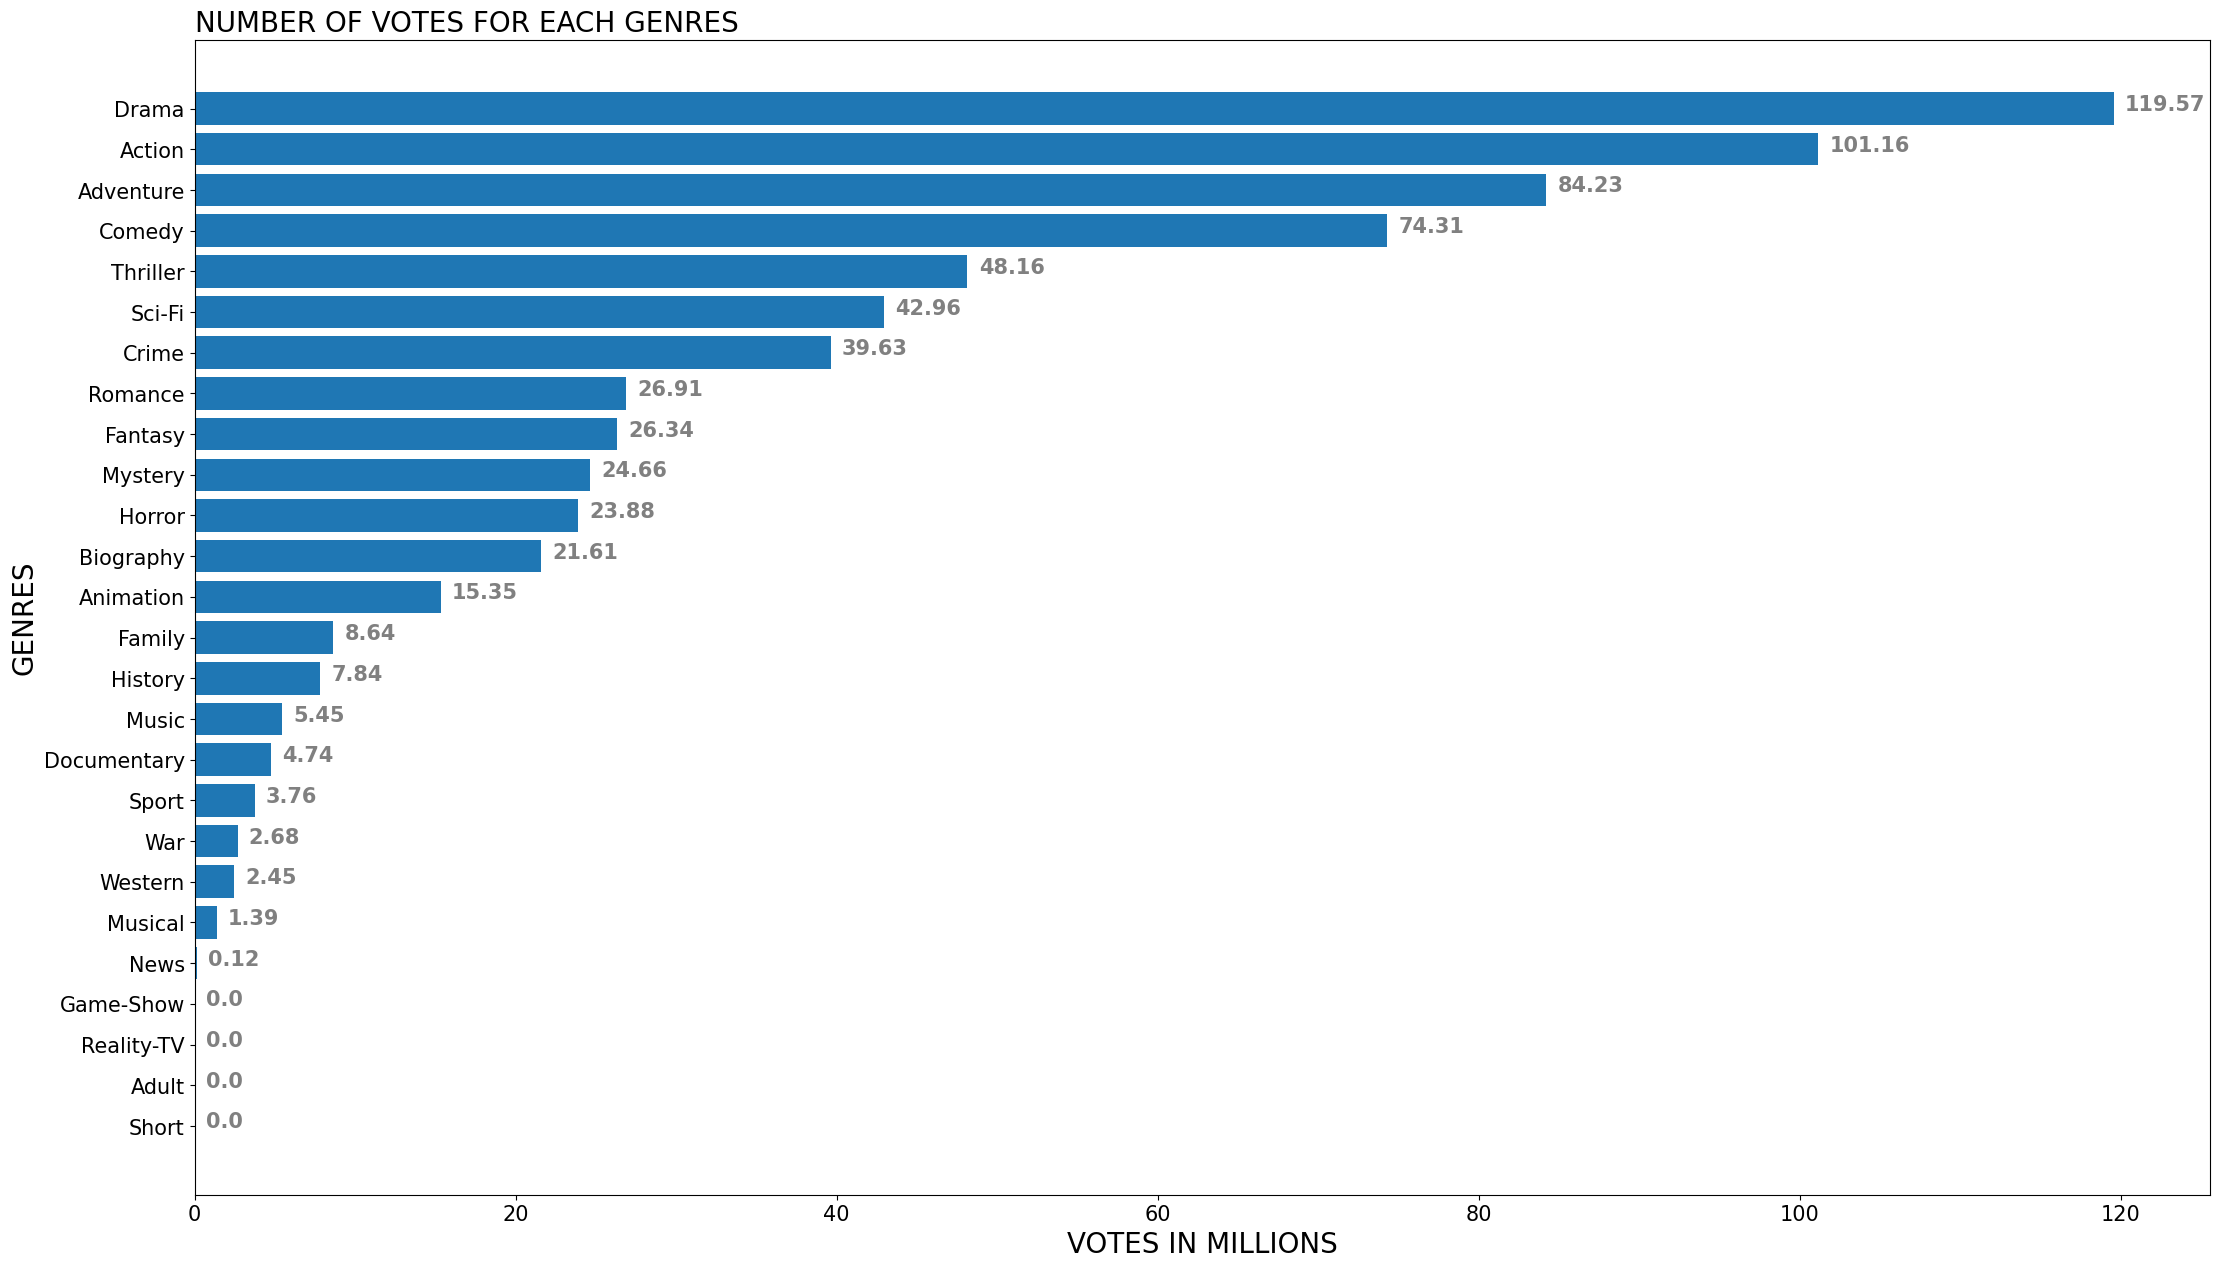

In [23]:
fig, ax = plt.subplots(figsize =(26, 15))
 
# Horizontal Bar Plot
ax.barh(numvotes_vs_averagerating.genres, numvotes_vs_averagerating.numvotes_mill)

for i in ax.patches:
    plt.text(i.get_width()+0.7, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 15, fontweight ='bold',
             color ='grey',
            va = 'center')


ax.set_ylabel('GENRES', fontsize = 20)  
ax.set_xlabel('VOTES IN MILLIONS', fontsize = 20)

ax.set_yticklabels(ax.get_yticklabels(), fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15)

ax.set_title('NUMBER OF VOTES FOR EACH GENRES',
             loc ='left', fontsize = 20)

C:\Users\zhesh\AppData\Local\Temp\ipykernel_21736\1370902125.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 15)


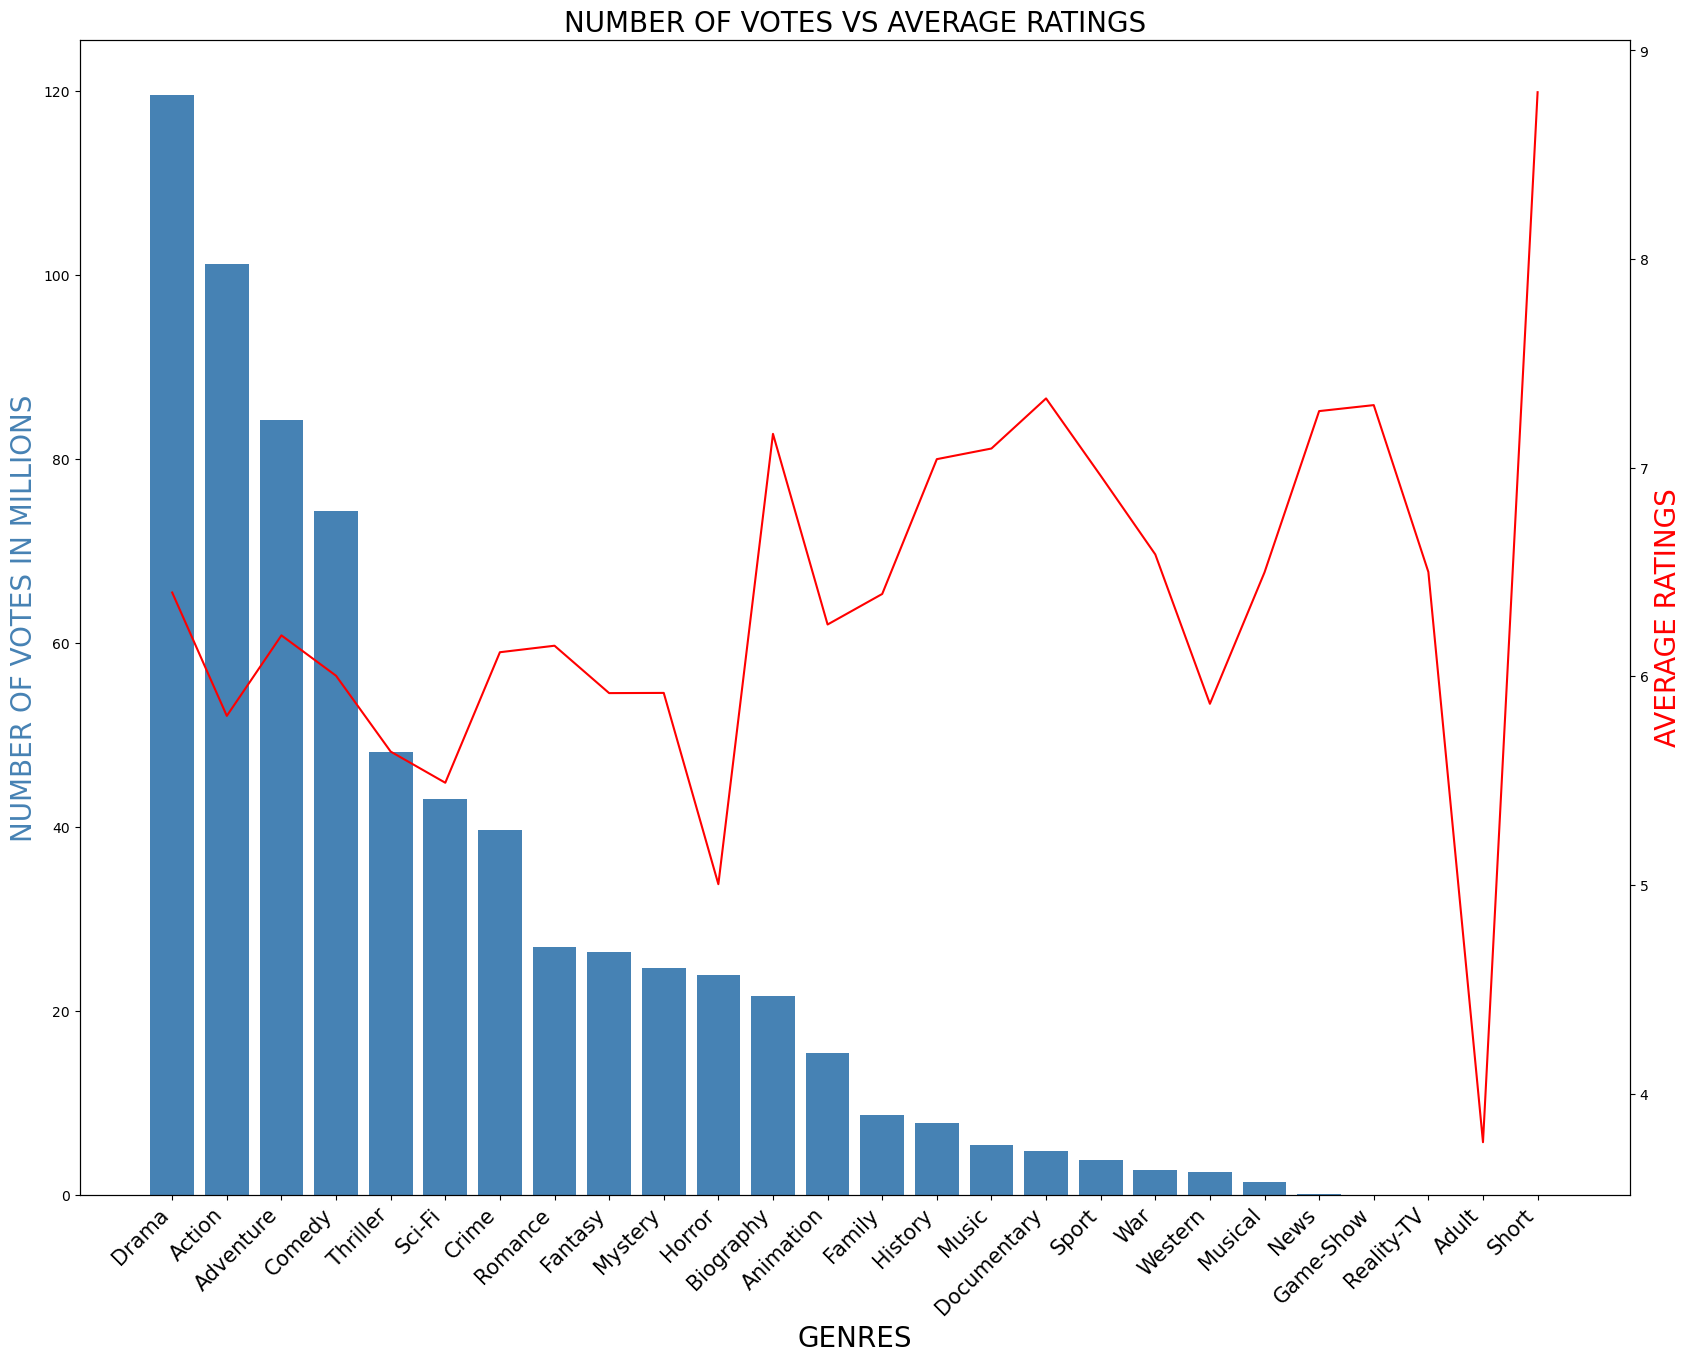

In [24]:
#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots(figsize =(20,15))

#add first line to plot
ax.bar(numvotes_vs_averagerating.genres, numvotes_vs_averagerating.numvotes_mill, color=col1)

#add x-axis label
ax.set_xlabel('GENRES', fontsize=20)

#add y-axis label
ax.set_ylabel('NUMBER OF VOTES IN MILLIONS', color=col1, fontsize=20)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(numvotes_vs_averagerating.genres, numvotes_vs_averagerating.averagerating, color=col2)

#add second y-axis label
ax2.set_ylabel('AVERAGE RATINGS', color=col2, fontsize=20)

ax.set_title('NUMBER OF VOTES VS AVERAGE RATINGS', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), ha = 'right', rotation=45, fontsize = 15)
ax.invert_xaxis()



#### From the char we can see a huge bias of avearage rating the lower number of vote counts

In [25]:
## findings:
###### HUGE BIAS REMOVE LOW VOTE COUNTS

# NEXT:
####### COMPARE GROSS
#####

In [26]:
#Removing movies with low vote counts

#movies_smaller_df = movies_df[(movies_df['numvotes'] >= 1000000)].reset_index(drop = True)
#movies_smaller_df

#By removing movies with low vote count we exclude potentially bias rated movies
#At the same time, we are able to identify the most popular movies with the combination of genres from 2010 - 2019

In [27]:
#########
movie_budget = pd.read_csv('dsc-phase-1-project-master/zippedData/tn.movie_budgets.csv.gz')
movie_budget = movie_budget.rename({'movie': 'title'}, axis=1)
movie_budget


,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [28]:
def clean_budget_data(tn_movie_budgets):
    '''
    Clean and change columns type to int.
    Only keep release year.
    '''
    tn_movie_budgets = tn_movie_budgets.drop(columns = ['id'])
    for column in ['production_budget', 'domestic_gross', 'worldwide_gross']:
        tn_movie_budgets[column] = tn_movie_budgets[column].str.replace('$','')
        tn_movie_budgets[column] = tn_movie_budgets[column].str.replace(',','')
        tn_movie_budgets[column] = tn_movie_budgets[column].astype('int64')
    return tn_movie_budgets

movie_budget = clean_budget_data(movie_budget)

In [48]:
master_df = movies_df.merge(movie_budget, on='title', how='left')
#master_df.dropna().groupby(['genres']).sum().reset_index()



,genres,title,year,numvotes,averagerating,release_date,production_budget,domestic_gross,worldwide_gross
0,Action,The Little PrinceCollideDiamond RuffHitmanJack...,48317,60720,132.4,"Feb 12, 2016Feb 24, 2017Dec 31, 2014Nov 21, 20...",6.513500e+08,6.584458e+08,1.633762e+09
1,"Action,Adventure",Reign of AssassinsFalcon Rising,4024,13945,12.7,"Nov 1, 2016Sep 4, 2014",1.850000e+07,1.177400e+04,1.136600e+07
2,"Action,Adventure,Animation",The CroodsLegend of the Guardians: The Owls of...,34239,3063175,126.3,"Mar 22, 2013Sep 24, 2010Feb 7, 2014Mar 26, 201...",1.957500e+09,2.664329e+09,7.435879e+09
3,"Action,Adventure,Biography",The RevenantAdmiralAdriftIn the Heart of the S...,10078,953047,35.6,"Dec 25, 2015Dec 31, 2008Jun 1, 2018Dec 11, 201...",3.550000e+08,2.835859e+08,9.404109e+08
4,"Action,Adventure,Comedy",Detention of the DeadMen in Black 3Kingsman: T...,60447,6132140,189.3,"Jun 28, 2013May 25, 2012Sep 22, 2017Jul 6, 201...",2.407000e+09,3.504298e+09,9.475300e+09
...,...,...,...,...,...,...,...,...,...
306,"Sci-Fi,Thriller",FrequencyRestorationAll Superheroes Must DieTh...,10074,31201,26.3,"Apr 28, 2000Dec 29, 1995Jan 4, 2013Dec 21, 197...",9.402000e+07,9.088392e+07,1.170149e+08
307,Sport,Won't Back Down,2014,77,7.9,"Sep 28, 2012",1.900000e+07,5.310554e+06,5.745503e+06
308,Thriller,Bad CompanyFriend RequestDrivenGamerForsakenTh...,86586,7964,231.2,"Jun 7, 2002Sep 22, 2017Apr 27, 2001Sep 4, 2009...",1.259063e+09,1.234782e+09,3.002051e+09
309,War,The Art of War,2018,9,2.8,"Aug 25, 2000",4.000000e+07,3.019910e+07,3.019910e+07


In [34]:
gross_df.groupby(['genres']).sum().reset_index()

,genres,title,year,numvotes,averagerating,release_date,production_budget,domestic_gross,worldwide_gross
0,Action,Karate GirlKing of the GameThe Little PrinceJ ...,1978015,329084,5654.6,"Feb 12, 2016Feb 24, 2017Dec 31, 2014Nov 21, 20...",6.513500e+08,6.584458e+08,1.633762e+09
1,"Action,Adult,Comedy",Joshi kosei boryoku kyoshitsuMoonshine Meat Ma...,4028,36,9.3,0,0.000000e+00,0.000000e+00,0.000000e+00
2,"Action,Adventure",Reign of AssassinsWar MachineMercenariesBarrac...,136966,109011,355.2,"Nov 1, 2016Sep 4, 2014",1.850000e+07,1.177400e+04,1.136600e+07
3,"Action,Adventure,Animation",The CroodsLegend of the Guardians: The Owls of...,336451,3570543,1096.0,"Mar 22, 2013Sep 24, 2010Feb 7, 2014Mar 26, 201...",1.957500e+09,2.664329e+09,7.435879e+09
4,"Action,Adventure,Biography",The RevenantAdmiral27 GunsXinguThe Taking of T...,42316,999701,148.3,"Dec 25, 2015Dec 31, 2008Jun 1, 2018Dec 11, 201...",3.550000e+08,2.835859e+08,9.404109e+08
...,...,...,...,...,...,...,...,...,...
918,Thriller,Black WidowRetornosParanormal AbductionBloody ...,3134873,440726,8873.1,"Jun 7, 2002Sep 22, 2017Apr 27, 2001Sep 4, 2009...",1.259063e+09,1.234782e+09,3.002051e+09
919,"Thriller,War",NofoziAfreenEssential KillingBefore the Fall,8053,7166,22.6,0,0.000000e+00,0.000000e+00,0.000000e+00
920,"Thriller,Western",RevengeRed HillSweetwaterCataract Gold,8053,13288,28.6,0,0.000000e+00,0.000000e+00,0.000000e+00
921,War,Svyaz vremyonMong songkraam weeraburutThousand...,94686,5535,288.3,"Aug 25, 2000",4.000000e+07,3.019910e+07,3.019910e+07


In [33]:
movies_df

,title,genres,year,numvotes,averagerating
0,Laiye Je Yaarian,Romance,2019,31,8.3
1,Borderless,Documentary,2019,559,8.9
2,Just Inès,Drama,2010,20,6.4
3,The Legend of Hercules,"Action,Adventure,Fantasy",2014,50352,4.2
4,Até Onde?,"Mystery,Thriller",2011,21,6.5
...,...,...,...,...,...
73851,Caisa,Documentary,2018,25,8.1
73852,Code Geass: Lelouch of the Rebellion - Glorifi...,"Action,Animation,Sci-Fi",2018,24,7.5
73853,Sisters,"Action,Drama",2019,14,4.7
73854,The Projectionist,Documentary,2019,5,7.0
